# **Keras iris Modeling**

In [1]:
import warnings
warnings.filterwarnings('ignore')

- 실습용 데이터 설정
  - iris.csv

In [2]:
import seaborn as sns

iris = sns.load_dataset('iris')

- pandas DataFrame

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **I. Data Preprocessing**

> ## **1) iris.species 빈도분석**

- species : setosa, virginica, versicolor

In [5]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

> ## **2) DataFrame to Array & Casting**

In [6]:
iris_AR = iris.values

iris_AR

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

- object to float

In [7]:
AR_X = iris_AR[:, 0:4].astype(float)
AR_y = iris_AR[:, 4]

AR_X.shape, AR_y.shape

((150, 4), (150,))

> ## **3) One Hot Encoding with sklearn & Keras**

- LabelEncoder()
  - ['setosa', 'virginica', 'versicolor'] to [0, 1, 2]

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
AR_yLBE = encoder.fit_transform(AR_y)

AR_yLBE

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- One-Hot Encoding - to_categorical()

In [9]:
from tensorflow.keras.utils import to_categorical

AR_yOHE = to_categorical(AR_yLBE)

AR_yOHE

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

> ## **4) Version Check**

- TensorFlow Version

In [10]:
import tensorflow

tensorflow.__version__

'2.5.0'

- Keras Version

In [11]:
tensorflow.keras.__version__

'2.5.0'

> ## **5) train_test_split()**

- 7:3

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(AR_X, AR_yOHE,
                                                    test_size=0.3,
                                                    random_state=2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

# **II. Keras Modeling**

> ## **1) Keras Models & Layers Import**

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

> ## **2) Model Define**

- 모델 신경망 구조 정의

In [14]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation='relu', input_shape=(4, )))   # (Hidden) Layer의 Neuron이 16개, activation function은 ReLU(Sigmoid나 Tanh도 사용 가능), input이 4개
Model_iris.add(layers.Dense(8, activation='relu'))
Model_iris.add(layers.Dense(3, activation='softmax'))                    # output이 3개, 다중 분류이기 때문에 activation function은 Softmax가 좋음(이 경우에는 Sigmoid나 Softmax만 사용 가능)

- 모델 구조 확인
  - Layer & Parameters

In [15]:
Model_iris.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


- 모델 레이어 시각화

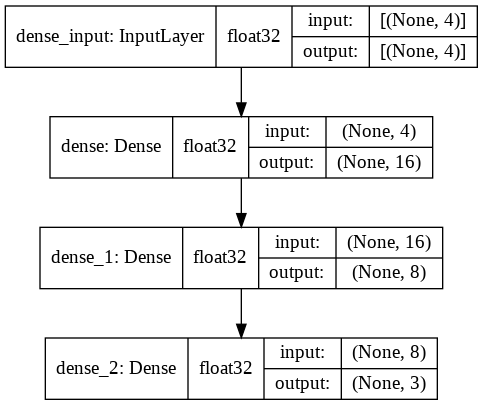

In [16]:
from tensorflow.keras import utils

utils.plot_model(Model_iris, show_shapes=True, show_dtype=True)

> ## **3) Model Compile**

- 모델 학습 방법 설정

In [17]:
Model_iris.compile(loss='categorical_crossentropy',               # 상황에 따라 binary_crossentropy나 mean_squared_error 사용
                   optimizer='adam',                              # SGD, Momentum, Adagrad, RMSPop, AdaDelta 등 사용 가능
                   metrics=['accuracy'])

> ## **4) Model Fit**

- 모델 학습 수행

In [18]:
History_iris = Model_iris.fit(X_train, y_train,
                              epochs=500,
                              batch_size=7,                       # 전체 Train Set 데이터가 105개이므로 15 * 500만큼 학습 수행
                              validation_data=(X_test, y_test))

Epoch 1/500
15/15 [==============================] - 1s 16ms/step - loss: 1.0864 - accuracy: 0.4571 - val_loss: 1.0797 - val_accuracy: 0.5333
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0591 - accuracy: 0.4667 - val_loss: 1.0620 - val_accuracy: 0.4667
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 1.0497 - accuracy: 0.5238 - val_loss: 1.0524 - val_accuracy: 0.5556
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0262 - accuracy: 0.5714 - val_loss: 1.0323 - val_accuracy: 0.5556
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0138 - accuracy: 0.6095 - val_loss: 1.0191 - val_accuracy: 0.5778
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0002 - accuracy: 0.6095 - val_loss: 1.0038 - val_accuracy: 0.5778
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9846 - accuracy: 0.6000 - val_loss: 0.9901 - val_accuracy: 0.5778
Epoch 8/500


> ## **5) 학습 결과 시각화**

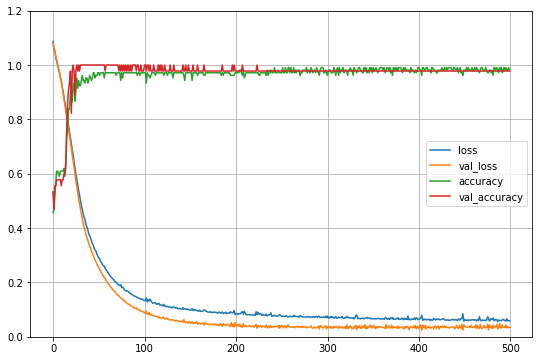

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.ylim(0, 1.2)
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()

> ## **6) Model Evaluate**

- Loss & Accuracy

In [20]:
loss, accuracy = Model_iris.evaluate(X_test, y_test)

print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))

2/2 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.9778
Loss = 0.03
Accuracy = 0.98


> ## **7) Model Predict**

- Probability

In [21]:
import numpy as np
np.set_printoptions(suppress=True, precision=5)

Model_iris.predict(X_test)

array([[0.99964, 0.00036, 0.     ],
       [0.99904, 0.00096, 0.     ],
       [0.00574, 0.99426, 0.     ],
       [0.     , 0.00047, 0.99953],
       [0.99983, 0.00017, 0.     ],
       [0.0004 , 0.99958, 0.00002],
       [0.     , 0.00398, 0.99602],
       [0.99991, 0.00009, 0.     ],
       [0.     , 0.00088, 0.99912],
       [0.99969, 0.00031, 0.     ],
       [0.     , 0.93756, 0.06244],
       [0.     , 0.00167, 0.99833],
       [0.     , 0.99845, 0.00155],
       [0.99996, 0.00004, 0.     ],
       [0.99987, 0.00013, 0.     ],
       [0.00001, 0.99747, 0.00252],
       [0.     , 0.98978, 0.01022],
       [0.99966, 0.00034, 0.     ],
       [0.00001, 0.99972, 0.00028],
       [0.9999 , 0.0001 , 0.     ],
       [0.99971, 0.00029, 0.     ],
       [0.99968, 0.00032, 0.     ],
       [0.     , 0.00055, 0.99945],
       [0.99979, 0.00021, 0.     ],
       [0.     , 0.05482, 0.94518],
       [0.     , 0.01086, 0.98914],
       [0.99984, 0.00016, 0.     ],
       [0.     , 0.99772, 0.

- Class

In [22]:
y_hat = Model_iris.predict_classes(X_test)

y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- Probabilty to Class

In [23]:
np.argmax(Model_iris.predict(X_test), axis=1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- One-Hot Encoding to Array
   - np.argmax() : 다차원 배열의 차원에 따라 가장 큰 값의 인덱스 반환
   - axis=1 : 열 기준

In [24]:
y = np.argmax(y_test, axis=1)

y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- Confusion Matrix & Classification Report

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [26]:
print(classification_report(y, y_hat,
                            target_names=['setosa', 'virginica', 'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
   virginica       0.93      1.00      0.97        14
  versicolor       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# **III. Model Save & Load**

> ## **1) File System**

- Save to Colab File System

In [27]:
!ls -l   # !dir

total 76
drwx------ 5 root root  4096 Aug  4 10:15 drive
-rw-r--r-- 1 root root 34600 Aug  4 10:12 Model_iris.h5
-rw-r--r-- 1 root root 29384 Aug  4 10:20 model.png
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


In [28]:
Model_iris.save('Model_iris.h5')

!ls -l

total 76
drwx------ 5 root root  4096 Aug  4 10:15 drive
-rw-r--r-- 1 root root 34600 Aug  4 10:21 Model_iris.h5
-rw-r--r-- 1 root root 29384 Aug  4 10:20 model.png
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


- Download Colab File System to Local File System

In [29]:
# from google.colab import files

# files.download('Model_iris.h5')

- Load from Colab File System

In [30]:
from keras.models import load_model

Model_local = load_model('Model_iris.h5')

In [31]:
Model_local.predict_classes(X_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

> ## **2) Google Drive**

- Mount Google Drive

In [32]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Check Mounted Drive

In [33]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets'

total 3850167
-rw------- 1 root root   31374019 Mar 31 15:04 Camel.zip
-rw------- 1 root root      20066 Mar 31 15:04 cat.1700.jpg
-rw------- 1 root root   69155672 Mar 31 15:04 creditCardFraud.zip
-rw------- 1 root root   82003032 Mar 31 15:05 DataSet.pkl
-rw------- 1 root root   90618980 Mar 31 15:05 dogs_and_cats_small.zip
-rw------- 1 root root   54561944 Mar 31 15:06 Face.zip
-rw------- 1 root root  862182613 Mar 31 15:10 GloVe.zip
-rw------- 1 root root  149574867 Jul 18 08:17 horse-or-human.zip
-rw------- 1 root root 1245927936 Mar 31 15:20 imagenetV2.zip
-rw------- 1 root root    8204887 Mar 31 15:06 Images_500.zip
-rw------- 1 root root   60711700 Mar 31 15:06 IMDB.zip
-rw------- 1 root root    4240457 Mar 31 15:07 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   80596565 Mar 31 15:08 ko_w2v.zip
-rw------- 1 root root   12929865 Mar 31 15:08 Logo_Data.zip
-rw------- 1 root root   18272469 Mar 31 15:09 MNIST.csv
-rw------- 1 root root    7903524 Mar 31 15:09 naverRatin

In [34]:
import pandas as pd

DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/PII.csv')

DF.head(3)

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2


In [35]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 34
-rw------- 1 root root 34600 Aug  4 10:21 001_Model_iris.h5


- Load from Mounted Google Drive Directory

In [36]:
from keras.models import load_model

Model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [37]:
Model_google.predict_classes(X_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])